## Imports

In [110]:
import seaborn as sns
import polars as pl
from polars import DataFrame, Series
from polars.expr.expr import Expr

## Exploratory Data Analysis

In [111]:
train_data: DataFrame = pl.read_csv("data/train.csv")

In [112]:
train_data.sample(10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
386,0,2,"""Davies, Mr. Charles Henry""","""male""",18.0,0,0,"""S.O.C. 14879""",73.5,null,"""S"""
201,0,3,"""Vande Walle, Mr. Nestor Cyriel""","""male""",28.0,0,0,"""345770""",9.5,null,"""S"""
418,1,2,"""Silven, Miss. Lyyli Karoliina""","""female""",18.0,0,2,"""250652""",13.0,null,"""S"""
681,0,3,"""Peters, Miss. Katie""","""female""",null,0,0,"""330935""",8.1375,null,"""Q"""
336,0,3,"""Denkoff, Mr. Mitto""","""male""",null,0,0,"""349225""",7.8958,null,"""S"""
41,0,3,"""Ahlin, Mrs. Johan (Johanna Per…","""female""",40.0,1,0,"""7546""",9.475,null,"""S"""
73,0,2,"""Hood, Mr. Ambrose Jr""","""male""",21.0,0,0,"""S.O.C. 14879""",73.5,null,"""S"""
35,0,1,"""Meyer, Mr. Edgar Joseph""","""male""",28.0,1,0,"""PC 17604""",82.1708,null,"""C"""
657,0,3,"""Radeff, Mr. Alexander""","""male""",null,0,0,"""349223""",7.8958,null,"""S"""


In [113]:
train_data.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


## Remove Null `Age` Values

### Create Filters

In [114]:
mean_miss_age: float = (
    train_data.filter(pl.col("Name").str.contains("Miss.")).get_column("Age").mean()
)
mean_master_age: float = (
    train_data.filter(pl.col("Name").str.contains("Master.")).get_column("Age").mean()
)
mean_mrs_age: float = (
    train_data.filter(pl.col("Name").str.contains("Mrs.")).get_column("Age").mean()
)
mean_mr_age: float = (
    train_data.filter(pl.col("Name").str.contains("Mr.")).get_column("Age").mean()
)
(
    round(mean_miss_age, 1),
    round(mean_master_age, 1),
    round(mean_mrs_age, 1),
    round(mean_mr_age, 1),
)

# name_age = train_data[['Name','Age']]
# mean_miss_age = name_age.fillter(pl.when(pl.col('Name').contains('Miss.') & pl.col('Age').is_null()).then(20.0).otherwise(pl.col('Age')))

(21.8, 4.6, 35.6, 33.1)

### Apply Filters

In [115]:
null_age_miss_filter: Expr = (
    pl.col("Name").str.contains("Miss.") & pl.col("Age").is_null()
)
null_age_master_filter: Expr = (
    pl.col("Name").str.contains("Master.") & pl.col("Age").is_null()
)
null_age_mrs_filter: Expr = (
    pl.col("Name").str.contains("Mrs.") & pl.col("Age").is_null()
)
null_age_mr_filter: Expr = pl.col("Name").str.contains("Mr.") & pl.col("Age").is_null()

### Update Null `Age` Values

In [116]:
updated_null_age_miss_train_data: DataFrame = train_data.with_columns(
    pl.when(null_age_miss_filter)
    .then(mean_miss_age)
    .otherwise(pl.col("Age"))
    .alias("Age")
)
updated_null_age_master_train_data: DataFrame = (
    updated_null_age_miss_train_data.with_columns(
        pl.when(null_age_master_filter)
        .then(mean_master_age)
        .otherwise(pl.col("Age"))
        .alias("Age")
    )
)
updated_null_age_mrs_train_data: DataFrame = (
    updated_null_age_master_train_data.with_columns(
        pl.when(null_age_mrs_filter)
        .then(mean_mrs_age)
        .otherwise(pl.col("Age"))
        .alias("Age")
    )
)
updated_null_age_mr_train_data: DataFrame = (
    updated_null_age_mrs_train_data.with_columns(
        pl.when(null_age_mr_filter)
        .then(mean_mr_age)
        .otherwise(pl.col("Age"))
        .alias("Age")
    )
)
updated_null_age_dr_train_data: DataFrame = updated_null_age_mr_train_data.with_columns(
    pl.when(null_age_mr_filter).then(40.0).otherwise(pl.col("Age")).alias("Age")
)

updated_null_age_dr_train_data.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",890.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",1.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.836345,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,13.298421,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,21.773973,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,30.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,35.642857,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


### Create Training `DataFrame`

In [117]:
passenger_class: Series = train_data["Pclass"].rank("dense").cast(pl.Int64) - 1
passenger_age: Series = train_data["Age"].fill_null(strategy="mean").round(1)
passenger_adult: Series = (passenger_age > 16).rank("dense").cast(pl.Int64) - 1
passenger_gender: Series = train_data["Sex"].rank("dense").cast(pl.Int64) - 1
passenger_family: Series = train_data["SibSp"] + train_data["Parch"]
# passenger_fare: Series = train_data['Fare'].fill_null(strategy='mean')
passenger_port: Series = train_data["Embarked"].fill_null(strategy="forward")
passenger_embarked: Series = passenger_port.rank("dense").cast(pl.Int64) - 1
passenger_is_child: Series = (passenger_age < 16).rank("dense").cast(pl.Int64) - 1
passenger_is_alone: Series = (passenger_family == 0).rank("dense").cast(pl.Int64) - 1
passenger_survided: Series = train_data["Survived"]

processed_data: DataFrame = DataFrame(
    {
        "class": passenger_class,
        "age": passenger_age,
        "adult": passenger_adult,
        "gender": passenger_gender,
        "family": passenger_family,
        # 'fare': passenger_fare,
        "embarked": passenger_embarked,
        "is_child": passenger_is_child,
        "is_alone": passenger_is_alone,
        "survived": passenger_survided,
    }
)

processed_data.describe()

statistic,class,age,adult,gender,family,embarked,is_child,is_alone,survived
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.308642,29.699327,0.887767,0.647587,0.904602,1.533109,0.093154,0.602694,0.383838
"""std""",0.836071,13.00194,0.315831,0.47799,1.613459,0.793069,0.290811,0.489615,0.486592
"""min""",0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",1.0,22.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
"""50%""",2.0,29.7,1.0,1.0,0.0,2.0,0.0,1.0,0.0
"""75%""",2.0,35.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0
"""max""",2.0,80.0,1.0,1.0,10.0,2.0,1.0,1.0,1.0


In [118]:
processed_data.sample(10)

class,age,adult,gender,family,embarked,is_child,is_alone,survived
i64,f64,i64,i64,i64,i64,i64,i64,i64
1,38.0,1,0,0,2,0,1,0
2,24.0,1,1,0,2,0,1,0
2,29.7,1,1,0,2,0,1,0
0,19.0,1,0,0,2,0,1,1
2,18.0,1,1,0,2,0,1,0
0,35.0,1,0,0,2,0,1,1
2,4.0,0,0,2,2,1,0,1
1,28.0,1,1,0,2,0,1,0
2,40.0,1,0,1,2,0,0,0


## Naive Visualisation of the Training Data

<Axes: xlabel='gender', ylabel='count'>

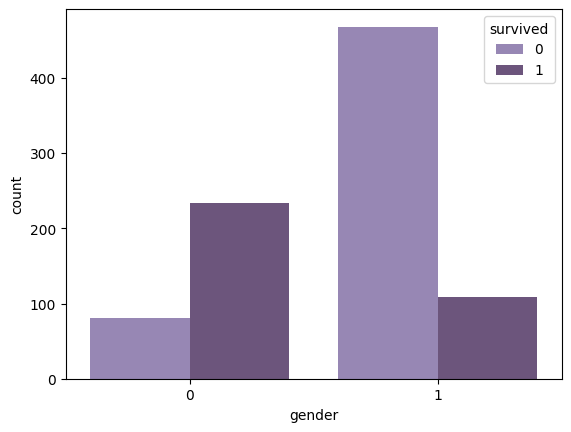

In [119]:
sns.countplot(data=processed_data, x="gender", hue="survived", palette="BuPu_d")

<Axes: xlabel='is_child', ylabel='count'>

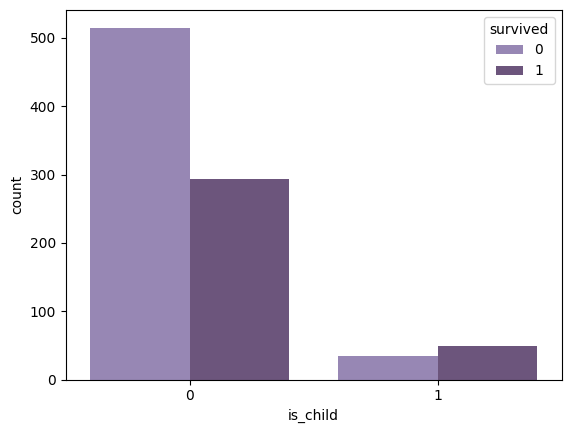

In [120]:
sns.countplot(data=processed_data, x="is_child", hue="survived", palette="BuPu_d")

<Axes: xlabel='class', ylabel='count'>

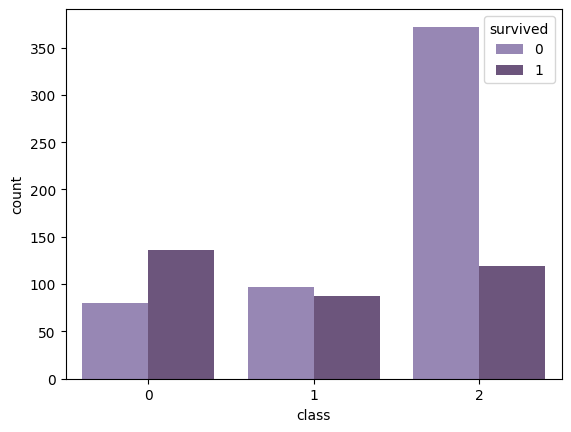

In [121]:
sns.countplot(data=processed_data, x="class", hue="survived", palette="BuPu_d")

<Axes: xlabel='age', ylabel='Density'>

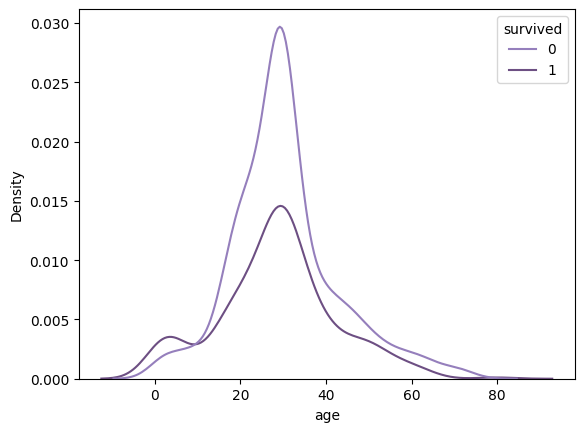

In [122]:
sns.kdeplot(data=processed_data, x="age", palette="BuPu_d", hue="survived")

<Axes: xlabel='age', ylabel='Density'>

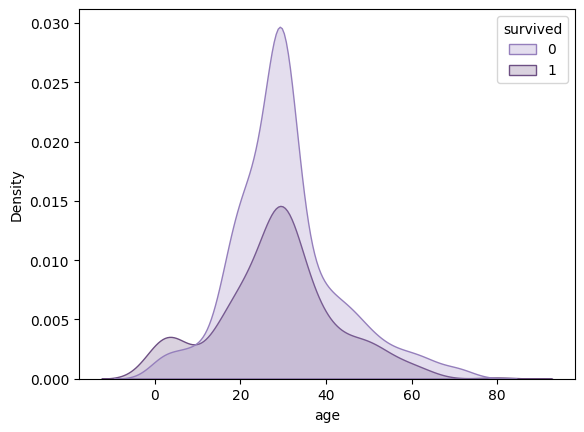

In [123]:
sns.kdeplot(data=processed_data, x="age", hue="survived", fill=True, palette="BuPu_d")

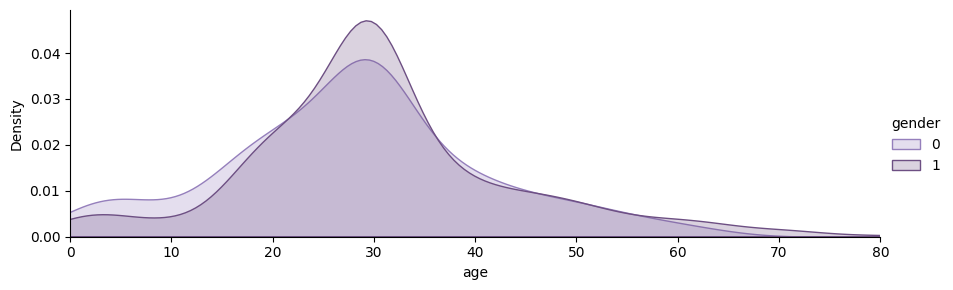

In [124]:
fg = sns.FacetGrid(data=processed_data, hue="gender", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", fill=True)
fg.add_legend()
fg.set(xlim=(0, processed_data["age"].max()))

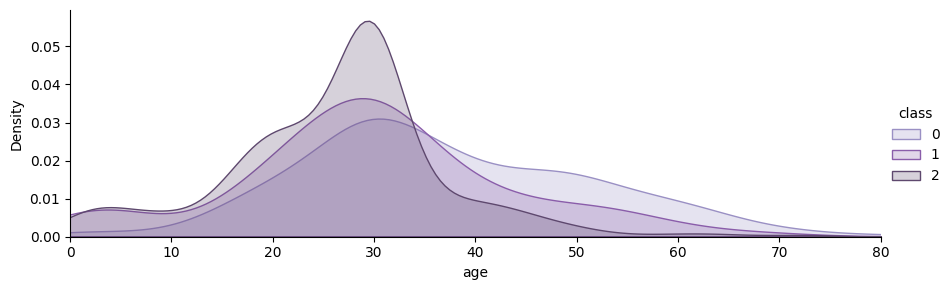

In [125]:
fg = sns.FacetGrid(data=processed_data, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", fill=True)
fg.add_legend()
fg.set(xlim=(0, processed_data["age"].max()))

<Axes: xlabel='family', ylabel='count'>

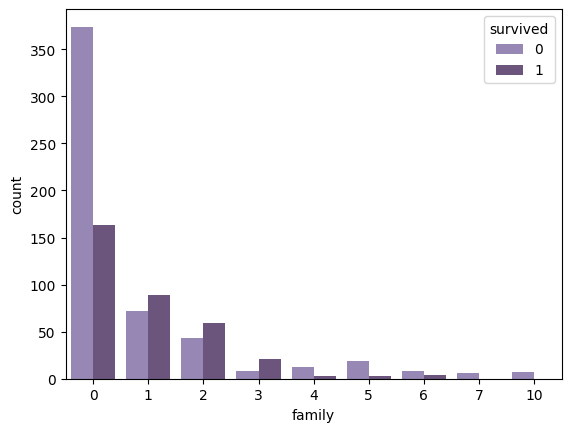

In [126]:
sns.countplot(data=processed_data, x="family", hue="survived", palette="BuPu_d")

<Axes: xlabel='is_alone', ylabel='count'>

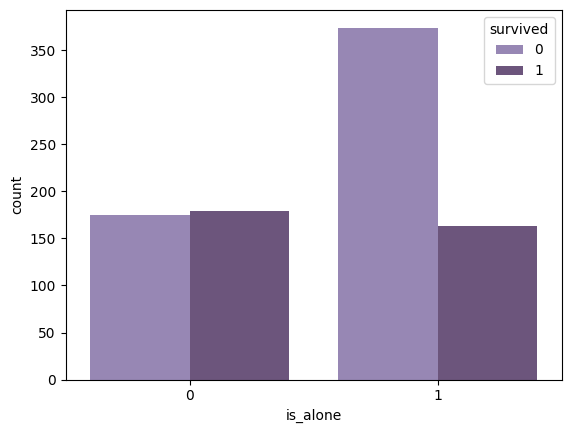

In [127]:
sns.countplot(data=processed_data, x="is_alone", hue="survived", palette="BuPu_d")

<Axes: >

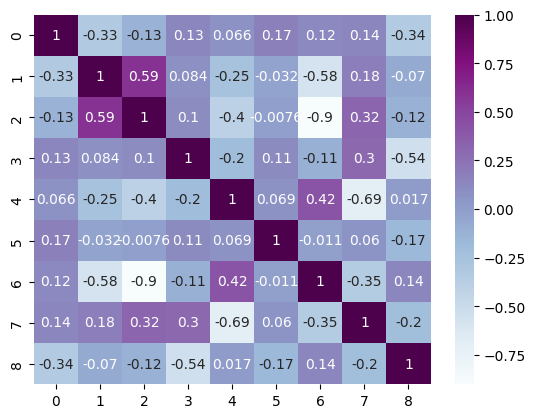

In [128]:
sns.heatmap(data=processed_data.corr(), annot=True, cmap="BuPu")